In [1]:
# ============================================================
# Core Data Handling and Numerical Computing
# ============================================================

import numpy as np                  # Numerical computing
import pandas as pd                 # Data manipulation and analysis


# ============================================================
# Scikit-Learn: Preprocessing and Pipelines
# ============================================================

from sklearn.compose import ColumnTransformer      # Column-wise preprocessing
from sklearn.pipeline import Pipeline              # ML pipelines
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer           # Missing value handling


# ============================================================
# Scikit-Learn: Model Selection and Validation
# ============================================================

from sklearn.model_selection import (
    train_test_split,               # Train-test splitting
    KFold,                          # K-fold cross-validation
    StratifiedKFold,                # Stratified CV (mainly for classification)
    GridSearchCV,                   # Hyperparameter tuning
    cross_val_score                 # Cross-validation scoring
)


# ============================================================
# Scikit-Learn: Models and Custom Estimators
# ============================================================

from sklearn.linear_model import LinearRegression   # Baseline regression model
from sklearn.base import BaseEstimator, RegressorMixin  # Custom estimator support


# ============================================================
# Scikit-Learn: Evaluation Metrics
# ============================================================

from sklearn.metrics import mean_squared_error, r2_score


# ============================================================
# Visualization and Plotting
# ============================================================

import matplotlib.pyplot as plt     # Core plotting
import seaborn as sns               # Statistical visualization

from IPython.display import Image   # Display images in notebooks

from mlxtend.plotting import (
    scatterplotmatrix,              # Feature relationship plots
    heatmap                         # Correlation heatmaps
)


# ============================================================
# Reproducibility
# ============================================================

from numpy.random import seed        # Set random seed


# ============================================================
# Model Persistence (Saving/Loading Models)
# ============================================================

import pickle                        # Save trained models

In [2]:
df = pd.read_csv('C:/Users/vyrim/OneDrive/Documents/Homework/06Spring2026/Demo/DL_Demo/notebooks/Default.csv')
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [3]:
print("Dataset shape:", df.shape)

Dataset shape: (10000, 4)


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  str    
 1   student  10000 non-null  str    
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), str(2)
memory usage: 312.6 KB


In [5]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [6]:
missing = df.isnull().sum()
print("Missing values per column:")
print(missing)

Missing values per column:
default    0
student    0
balance    0
income     0
dtype: int64


In [7]:
missing_pct = (df.isnull().sum() / len(df) * 100).round(2)
print("\nMissing percentage:")
print(missing_pct)


Missing percentage:
default    0.0
student    0.0
balance    0.0
income     0.0
dtype: float64


In [8]:
df['default'] = df['default'].map({'No': 0, 'Yes': 1})

# ── Verify the conversion ─────────────────────────────────
print(df['default'].unique())     # Expected: [0 1]
print(df['default'].dtype)       # Expected: int64
df.head()

[0 1]
int64


,default,student,balance,income
0,0,No,729.526495,44361.625074
1,0,Yes,817.180407,12106.134700
2,0,No,1073.549164,31767.138947
3,0,No,529.250605,35704.493935
4,0,No,785.655883,38463.495879


In [9]:
print("Class counts:")
print(df['default'].value_counts())

Class counts:
default
0    9667
1     333
Name: count, dtype: int64


In [10]:
print("\nClass percentages:")
print(df['default'].value_counts(normalize=True).mul(100).round(2))


Class percentages:
default
0    96.67
1     3.33
Name: proportion, dtype: float64


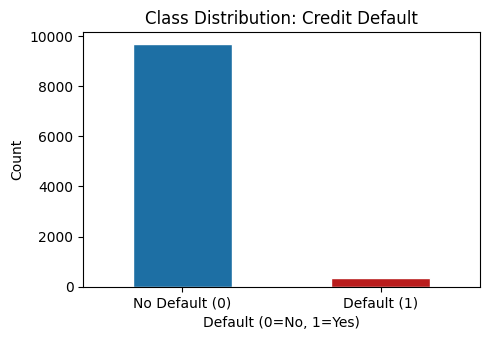

In [11]:
fig, ax = plt.subplots(figsize=(5, 3.5))
df['default'].value_counts().plot(
    kind='bar', ax=ax,
    color=['#1d6fa4', '#b91c1c'],
    edgecolor='white', width=0.5
)
ax.set_title('Class Distribution: Credit Default', fontsize=12)
ax.set_xlabel('Default (0=No, 1=Yes)')
ax.set_ylabel('Count')
ax.set_xticklabels(['No Default (0)', 'Default (1)'], rotation=0)
plt.tight_layout()
plt.show()

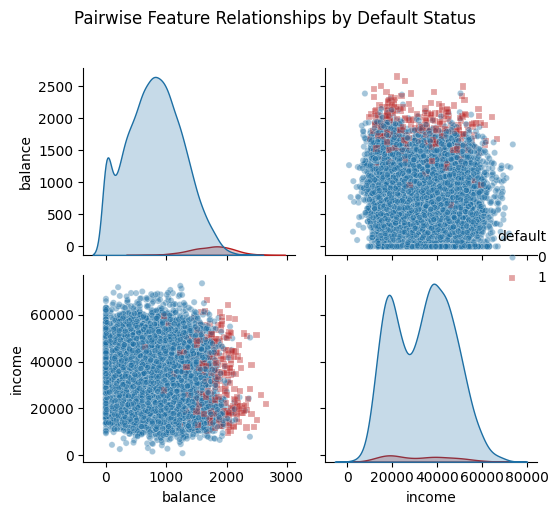

In [12]:
sns.pairplot(
    df,
    vars=['balance', 'income'],
    hue='default',
    palette={0: '#1d6fa4', 1: '#b91c1c'},
    diag_kind='kde',
    plot_kws={'alpha': 0.4, 's': 20},
    markers=['o', 's']
)
plt.suptitle('Pairwise Feature Relationships by Default Status',
             y=1.02, fontsize=12)
plt.tight_layout()
plt.show()